In [1]:
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import *

%matplotlib inline
%matplotlib notebook

In [2]:
steps = []

for i in range(999, -1, -1):
    steps.append(np.load(f"./lsun/sample_8x256x256x3_step_{i}_0.npz")["arr_0"])

<IPython.core.display.Javascript object>


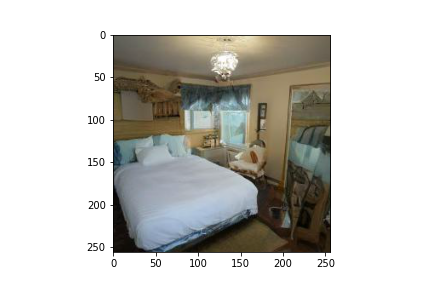

In [4]:
plt.imshow(np.load(f"./lsun/samples_8x256x256x3_lsun_uncond_100M_1200K_bs128.npz")["arr_0"][0])
plt.show()

<IPython.core.display.Javascript object>


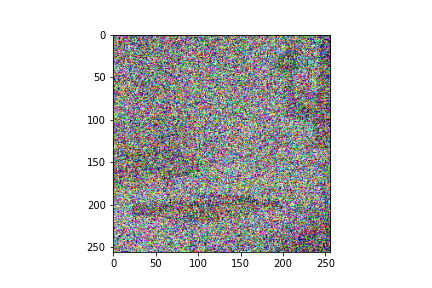

interactive(children=(IntSlider(value=0, description='step', max=999), IntSlider(value=0, description='k', max…

In [7]:
k = 0

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.imshow(steps[0][k])

def update(step = 0, k = 0):
    ax.imshow(steps[step][k])
    fig.canvas.draw_idle()

interact(update, step=(0, 999), k=(0,7));

<IPython.core.display.Javascript object>


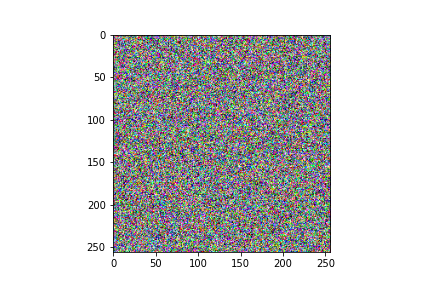

MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.
MovieWriter ffmpeg unavailable; using Pillow instead.


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

for k in range(len(steps[0])):
    def f(i):
        return steps[i][k]

    x = np.linspace(0, 2 * np.pi, 120)
    y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

    # ims is a list of lists, each row is a list of artists to draw in the
    # current frame; here we are just animating one artist, the image, in
    # each frame
    ims = []
    for i in range(0, 1000, 10):
        x += np.pi / 15.
        y += np.pi / 20.
        im = ax.imshow(f(i), animated=True)
        if i == 0:
            ax.imshow(f(i))  # show an initial one first
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                    repeat_delay=1000)

    # To save the animation, use e.g.
    #
    ani.save(f"./lsun/steps_{k}.gif")
    #
    # or
    #
    # writer = animation.FFMpegWriter(
    #     fps=15, metadata=dict(artist='Me'), bitrate=1800)
    # ani.save("movie.mp4", writer=writer)

    plt.show()